Test loss: 0.1283
R2 score: 0.8413160866878336


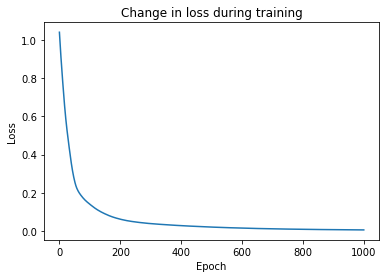

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Učitavanje skupa podataka
boston = load_boston()

# Standardizacija podataka
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
y = scaler.fit_transform(boston.target.reshape(-1, 1))

# Razdvajanje skupa podataka na skupove za obučavanje i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisanje potpuno povezane neuronske mreže
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Definisanje funkcije gubitka i optimizatora
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Pamcenje funkcije gubitka tokom treninga
train_losses = []

# Obučavanje neuronske mreže
for epoch in range(1000):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    train_losses.append(loss)
    loss.backward()
    optimizer.step()

# Vizuelizacija loss funkcije tokom treninga:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Change in loss during training')


# Testiranje neuronske mreže
with torch.no_grad():
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float()
    outputs = net(inputs)
    test_loss = criterion(outputs, targets)
    print(f"Test loss: {test_loss.item():.4f}")
    print(f"R2 score: {r2_score(outputs, targets)}")


